# New data and our data

In [1]:
import pandas as pd

# Load your CSV files
file1 = 'our_data_new_data_control.csv'
file2 = 'our_data_new_data_obesity.csv'
file3 = 'relative_abundance_T2D Data.csv'

# Read dataframes from files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Merge the first two dataframes based on the "Genus" column
merged_df = pd.merge(df1, df2, on='Genus', how='outer', suffixes=('_file1', '_file2'))

# Merge the third dataframe onto the merged result
final_merged_df = pd.merge(merged_df, df3, on='Genus', how='outer', suffixes=('', '_file3'))

# Replace NaN values with zeros
final_merged_df.fillna(0, inplace=True)

# Save merged data to a new Excel file
output_file = 'merged_genus_data.xlsx'
final_merged_df.to_excel(output_file, index=False)

print(f"Merged data saved to {output_file}")


Merged data saved to merged_genus_data.xlsx


# Naive Bayes

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the sampling strategy as a dictionary
sampling_strategy = {0: 802, 1: 802, 2: 802}  # Assuming class 0 is majority, and classes 1 and 2 are minority

# Define SMOTE with the sampling strategy
over = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train_encoded)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train_scaled, y_train_smote)

# Cross-validation scores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mnb, X_train_scaled, y_train_smote, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')
print("*" * 100)

# Feature importance (if applicable to your model)
# You can access feature importance scores using mnb.feature_importances_ (if supported by the model)

# Predict on the test set
y_pred = mnb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the model
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet3")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for the new patient
new_patient_pred = mnb.predict(new_patient_scaled)

# Decode the predicted class for the new patient
new_patient_disease = le.inverse_transform(new_patient_pred)

print("*" * 100)
# Print the predicted disease for the new patient
print(f"The new patient is predicted to have: {new_patient_disease[0]}")

# Predict the probabilities for the new patient
new_patient_prob = mnb.predict_proba(new_patient_scaled)

# Map probabilities to class names
disease_probabilities = dict(zip(le.classes_, new_patient_prob[0]))

# Print the probabilities of each disease for the new patient
print("Probabilities of each disease for the new patient using Naive Bayes:")
for disease, prob in disease_probabilities.items():
    print(f"{disease}: {prob:.2f}")
print("*" * 100)


****************************************************************************************************
Cross-validation scores: [0.71161826 0.7047817  0.72349272 0.71517672 0.73388773]
Average cross-validation score: 0.7177914269200577
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

     Control       0.66      0.24      0.35        87
     Obesity       0.70      0.91      0.79       160
         T2D       0.44      1.00      0.62         4

    accuracy                           0.68       251
   macro avg       0.60      0.72      0.59       251
weighted avg       0.68      0.68      0.64       251

****************************************************************************************************
**********************************************************************************

              precision    recall  f1-score   support

     Control       0.66      0.24      0.35        87
     Obesity       0.70      0.91      0.79       160
         T2D       0.44      1.00      0.62         4

    accuracy                           0.68       251
   macro avg       0.60      0.72      0.59       251
weighted avg       0.68      0.68      0.64       251

****************************************************************************************************

Confusion Matrix (Table):

          Control  Obesity  T2D
Control       21       64    2
Obesity       11      146    3
T2D            0        0    4
****************************************************************************************************


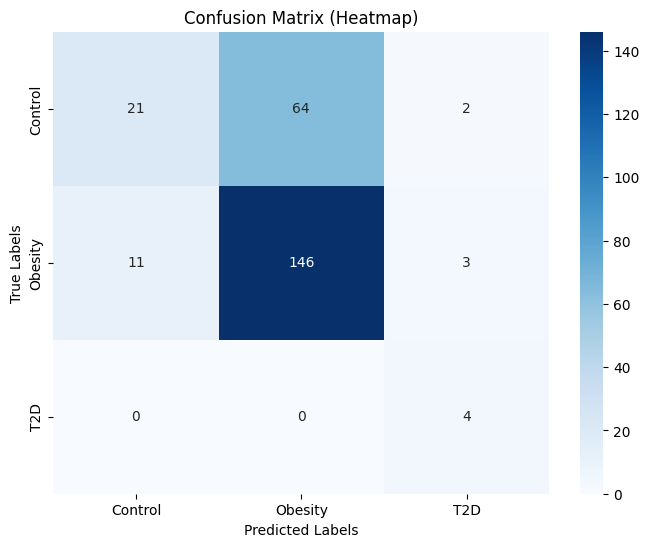

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the sampling strategy as a dictionary
sampling_strategy = {0: 802, 1: 802, 2: 802}  # Assuming class 0 is majority, and classes 1 and 2 are minority

# Define SMOTE with the sampling strategy
over = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train_encoded)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred = mnb.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))
print("*" * 100)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Display the confusion matrix as a table
confusion_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("\nConfusion Matrix (Table):\n\n", confusion_df)
print("*" * 100)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Heatmap)')
plt.show()

The precision, recall, and F1-scores give us detailed insights into our model's performance for each class. For 'Obesity,' the model performs quite well with high recall and a good F1-score. However, for 'Control,' the recall is quite low, meaning it misses many healthy individuals. The 'T2D' class has perfect recall but low precision due to the small number of actual cases. Overall, our model has a good accuracy of 68%, but we need to work on improving the performance for identifying healthy individuals (Control)

Simple Summary:
The model is good at identifying obese people (146 correctly identified).
The model has trouble distinguishing between healthy people and obese people (64 healthy people were misclassified as obese, 
    and 11 obese people were misclassified as healthy).
The model is good at identifying people with T2D (4 correctly identified and no misclassifications).


"The confusion matrix helps us see how well our model is performing. It shows that our model is quite accurate in 
identifying obese individuals and those with Type 2 Diabetes, but it has some difficulty distinguishing between 
healthy and obese individuals. We can use this information to understand where our model is strong and where it needs improvement."

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the sampling strategy as a dictionary
sampling_strategy = {0: 802, 1: 802, 2: 802}  # Assuming class 0 is majority, and classes 1 and 2 are minority

# Define SMOTE with the sampling strategy
over = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train_encoded)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train_scaled, y_train_smote)

# Cross-validation scores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mnb, X_train_scaled, y_train_smote, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')
print("*" * 100)

# Predict on the test set
y_pred = mnb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the model
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = mnb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = mnb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


****************************************************************************************************
Cross-validation scores: [0.71161826 0.7047817  0.72349272 0.71517672 0.73388773]
Average cross-validation score: 0.7177914269200577
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

     Control       0.66      0.24      0.35        87
     Obesity       0.70      0.91      0.79       160
         T2D       0.44      1.00      0.62         4

    accuracy                           0.68       251
   macro avg       0.60      0.72      0.59       251
weighted avg       0.68      0.68      0.64       251

****************************************************************************************************
**********************************************************************************

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train_encoded)

# Best parameters from RandomizedSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)
# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
****************

In [4]:
# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet3")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)

****************************************************************************************************
Patient 1 is predicted to have: Obesity
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Obesity
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Obesity
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Control
Patient 8 is predicted to have: Control
Patient 9 is predicted to have: Control
Patient 10 is predicted to have: Control
****************************************************************************************************
Probabilities of each disease for Patient 1:
Control: 0.02
Obesity: 0.98
T2D: 0.00
****************************************************************************************************
Probabilities of each disease for Patient 2:
Control: 0.97
Obesity: 0.03
T2D: 0.00
****************************************************************************************************
Probabilities of each disease

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy={0: 802, 1: 802, 2: 802}, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train_smote)

# Best parameters from RandomizedSearchCV
best_xgb = grid_search_xgb.best_estimator_

print("*" * 100)
print("Best parameters: ", best_xgb)
print("*" * 100)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train_smote, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_scaled, y_train_smote)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


****************************************************************************************************
Best parameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
******************

In [ ]:
def y_threshold(val):
    """
    Process the predictions by applying absolute value, exponentiation, normalization,
    and thresholding.

    Parameters:
    val (np.ndarray): The predicted values.

    Returns:
    np.ndarray: The processed predictions.
    """
    # Apply absolute value to predictions
    value = np.abs(val)
    # Apply threshold to set small values to 0
    value[value < 1e-5] = 0.0
    # Replace NaNs with 0
    value = np.nan_to_num(value, nan=0.0)

In [8]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Function to replace values below 1e-5 with 0 for numeric values
def replace_values(value):
    try:
        return 0 if float(value) < 1e-5 else value
    except (ValueError, TypeError):
        return value

# Apply the function to all cells in the dataframe
df = df.applymap(replace_values)

# Save the modified dataframe back to an Excel file
df.to_excel("merged_genus_data3.xlsx", sheet_name="Sheet1")

print(f"Modified file saved to merged_genus_data2.xlsx")


C:\Users\sogeb\AppData\Local\Temp\ipykernel_22292\1447011325.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(replace_values)


Modified file saved to merged_genus_data2.xlsx


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train_encoded)

# Best parameters from RandomizedSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)
# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
****************

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 5, 10, 20]  # Adding this parameter to handle imbalance
}
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=200, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Best parameters from RandomizedSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:00:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************


C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:01:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:01:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are no

****************************************************************************************************
XGBoost Cross-validation scores: [0.88831169 0.88311688 0.85714286 0.8984375  0.86197917]
Average XGBoost Cross-validation score: 0.877797619047619
****************************************************************************************************


C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:02:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


****************************************************************************************************
              precision    recall  f1-score   support

     Control       0.58      0.40      0.48        87
     Obesity       0.72      0.82      0.77       160
         T2D       0.57      1.00      0.73         4

    accuracy                           0.68       251
   macro avg       0.62      0.74      0.66       251
weighted avg       0.67      0.68      0.67       251

****************************************************************************************************
****************************************************************************************************
Patient 1 is predicted to have: Control
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Control
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Control
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Control
Patient 8 is predicted to have: Cont

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)
print(f"Resampled dataset shape: {Counter(y_train_resampled)}")

# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize models
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Hyperparameter grids
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [-1, 3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

param_grid_catboost = {
    'iterations': [100, 200, 300, 400],
    'depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized search for each model
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_lgbm = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid_lgbm, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_catboost = RandomizedSearchCV(estimator=catboost, param_distributions=param_grid_catboost, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')

# Fit the models
grid_search_xgb.fit(X_train_poly, y_train_resampled)
grid_search_lgbm.fit(X_train_poly, y_train_resampled)
grid_search_catboost.fit(X_train_poly, y_train_resampled)

# Best estimators
best_xgb = grid_search_xgb.best_estimator_
best_lgbm = grid_search_lgbm.best_estimator_
best_catboost = grid_search_catboost.best_estimator_

print("*" * 100)
print("Best parameters XGB : ", best_xgb)
print("Best parameters LGBM : ", best_lgbm)
print("Best parameters CatBoost : ", best_catboost)
print("*" * 100)

# Cross-validation scores for each model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_poly, y_train_resampled, cv=cv, scoring='accuracy')
cv_scores_lgbm = cross_val_score(best_lgbm, X_train_poly, y_train_resampled, cv=cv, scoring='accuracy')
cv_scores_catboost = cross_val_score(best_catboost, X_train_poly, y_train_resampled, cv=cv, scoring='accuracy')

print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print(f'LightGBM Cross-validation scores: {cv_scores_lgbm}')
print(f'Average LightGBM Cross-validation score: {np.mean(cv_scores_lgbm)}')
print(f'CatBoost Cross-validation scores: {cv_scores_catboost}')
print(f'Average CatBoost Cross-validation score: {np.mean(cv_scores_catboost)}')
print("*" * 100)

# Train the models with the best parameters
best_xgb.fit(X_train_poly, y_train_resampled)
best_lgbm.fit(X_train_poly, y_train_resampled)
best_catboost.fit(X_train_poly, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_poly)
y_pred_lgbm = best_lgbm.predict(X_test_poly)
y_pred_catboost = best_catboost.predict(X_test_poly)

print("*" * 100)
# Evaluate the models
print("XGBoost Classification Report")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("LightGBM Classification Report")
print(classification_report(y_test_encoded, y_pred_lgbm, target_names=le.classes_))
print("CatBoost Classification Report")
print(classification_report(y_test_encoded, y_pred_catboost, target_names=le.classes_))
print("*" * 100)

# Ensemble Predictions
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('lgbm', best_lgbm),
    ('catboost', best_catboost)
], voting='soft')

ensemble_model.fit(X_train_poly, y_train_resampled)
y_pred_ensemble = ensemble_model.predict(X_test_poly)

print("Ensemble Model Classification Report")
print(classification_report(y_test_encoded, y_pred_ensemble, target_names=le.classes_))

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)
new_patient_poly = poly.transform(new_patient_scaled)

# Predict the disease for each new patient using ensemble model
new_patient_preds = ensemble_model.predict(new_patient_poly)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = ensemble_model.predict_proba(new_patient_poly)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


Resampled dataset shape: Counter({0: 641, 1: 641, 2: 641})


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
import time

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the sampling strategy as a dictionary
sampling_strategy = {0: 802, 1: 802, 2: 802}  

# Address class imbalance using SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Initialize models
xgb = XGBClassifier(random_state=42)
nb = MultinomialNB()
svm = SVC(probability=True, random_state=42)

# Hyperparameter grids
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Randomized search for XGBoost and SVM
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_grid_svm, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')

# Fit the models
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Best estimators
best_xgb = grid_search_xgb.best_estimator_
best_svm = grid_search_svm.best_estimator_

print("*" * 100)
print("Best parameters XGB : ", best_xgb)
print("Best parameters SVM : ", best_svm)
print("*" * 100)

# Cross-validation scores for each model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
cv_scores_svm = cross_val_score(best_svm, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
cv_scores_nb = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print(f'SVM Cross-validation scores: {cv_scores_svm}')
print(f'Average SVM Cross-validation score: {np.mean(cv_scores_svm)}')
print(f'Naive Bayes Cross-validation scores: {cv_scores_nb}')
print(f'Average Naive Bayes Cross-validation score: {np.mean(cv_scores_nb)}')
print("*" * 100)

# Train the models with the best parameters
best_xgb.fit(X_train_resampled, y_train_resampled)
best_svm.fit(X_train_resampled, y_train_resampled)
nb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_nb = nb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the models
print("XGBoost Classification Report")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("SVM Classification Report")
print(classification_report(y_test_encoded, y_pred_svm, target_names=le.classes_))
print("Naive Bayes Classification Report")
print(classification_report(y_test_encoded, y_pred_nb, target_names=le.classes_))
print("*" * 100)

# Ensemble Predictions
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('svm', best_svm),
    ('nb', nb)
], voting='soft')

ensemble_model.fit(X_train_resampled, y_train_resampled)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

print("Ensemble Model Classification Report")
print(classification_report(y_test_encoded, y_pred_ensemble, target_names=le.classes_))

# Measure time for data preprocessing
start_time = time.time()
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)
preprocessing_time = time.time() - start_time

# Measure time for prediction
start_time = time.time()
new_patient_preds = ensemble_model.predict(new_patient_scaled)
prediction_time = time.time() - start_time

print(f"Time taken for data preprocessing: {preprocessing_time:.4f} seconds")
print(f"Time taken for model prediction: {prediction_time:.4f} seconds")

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = ensemble_model.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


****************************************************************************************************
Best parameters XGB :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Best parameters SVM :  SVC(C=100, gamma=1, probability=True, random_state=42)
************************************